D210 - Representation and Reporting

DMC Hospital Admissions Data

In [3]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load medical_clean CSV
df_210=pd.read_csv('C:/Users/Kmoik WGU/Desktop/D210/HDHIAdmis.csv')

In [5]:
df_210.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_210.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING                         

In [7]:
#search for duplicates
print(df_210.duplicated().value_counts())

False    15757
Name: count, dtype: int64


In [8]:
#check for null values - even though view of data indicates no nulls
df_210.isnull().sum()

SNO                                   0
MRD No.                               0
D.O.A                                 0
D.O.D                                 0
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
month year                            0
DURATION OF STAY                      0
duration of intensive unit stay       0
OUTCOME                               0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
HB                                  252
TLC                                 286
PLATELETS                           285
GLUCOSE                             863
UREA                                241
CREATININE                          247


As the null values are not in any corresponding values in the WGU medical_clean data set, I will just uniformly drop them

In [9]:
#drop nulls
df_210.dropna(inplace=True)

In [10]:
df_210.isnull().sum()

SNO                                0
MRD No.                            0
D.O.A                              0
D.O.D                              0
AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
month year                         0
DURATION OF STAY                   0
duration of intensive unit stay    0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
PRIOR CMP                          0
CKD                                0
HB                                 0
TLC                                0
PLATELETS                          0
GLUCOSE                            0
UREA                               0
CREATININE                         0
BNP                                0
RAISED CARDIAC ENZYMES             0
E

In [11]:
#create new data set with select features
new_210=df_210[['AGE', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'DURATION OF STAY']]

In [12]:
new_210.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6561 entries, 0 to 15756
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   AGE                              6561 non-null   int64 
 1   GENDER                           6561 non-null   object
 2   RURAL                            6561 non-null   object
 3   TYPE OF ADMISSION-EMERGENCY/OPD  6561 non-null   object
 4   DURATION OF STAY                 6561 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 307.5+ KB


In [13]:
#rename columns
new_210.rename(columns={'TYPE OF ADMISSION-EMERGENCY/OPD' : 'Initial_admin', 'DURATION OF STAY' : 'Initial_days', 'AGE' : 'Age', 'GENDER' : 'Gender', 'RURAL' : 'Area'}, inplace=True)

C:\Users\Kmoik WGU\AppData\Local\Temp\ipykernel_8384\789317960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_210.rename(columns={'TYPE OF ADMISSION-EMERGENCY/OPD' : 'Initial_admin', 'DURATION OF STAY' : 'Initial_days', 'AGE' : 'Age', 'GENDER' : 'Gender', 'RURAL' : 'Area'}, inplace=True)


In [51]:
#rename variables in Gender
new_df=new_210.replace({'M': 'Male', 'F': 'Female', 'E':'Emergency', 'R':'Rural', 'U':'Urban'})

In [52]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6561 entries, 0 to 15756
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            6561 non-null   int64 
 1   Gender         6561 non-null   object
 2   Area           6561 non-null   object
 3   Initial_admin  6561 non-null   object
 4   Initial_days   6561 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 307.5+ KB


Visualize data

<Axes: xlabel='Age'>

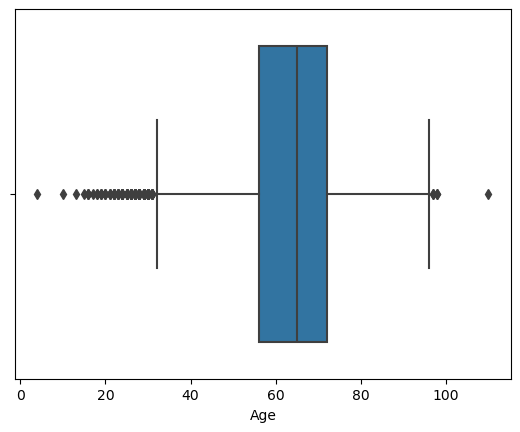

In [35]:
sns.boxplot(new_df, x='Age')

In [36]:
new_df.Age.describe()

count    6561.000000
mean       63.540009
std        12.990649
min         4.000000
25%        56.000000
50%        65.000000
75%        72.000000
max       110.000000
Name: Age, dtype: float64

<Axes: xlabel='Initial_days'>

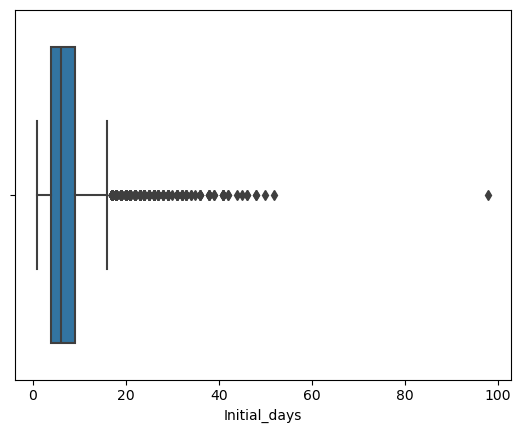

In [37]:
sns.boxplot(new_df, x='Initial_days')

In [38]:
new_df.Initial_days.describe()

count    6561.000000
mean        7.433623
std         5.257911
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Initial_days, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

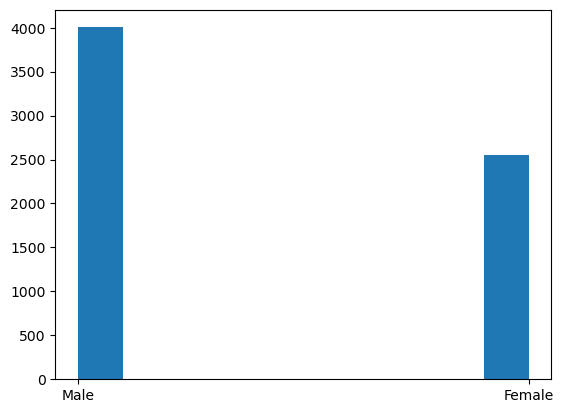

In [39]:
plt.hist(new_df['Gender'])
plt.show

In [40]:
new_df.Gender.describe()

count     6561
unique       2
top       Male
freq      4005
Name: Gender, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

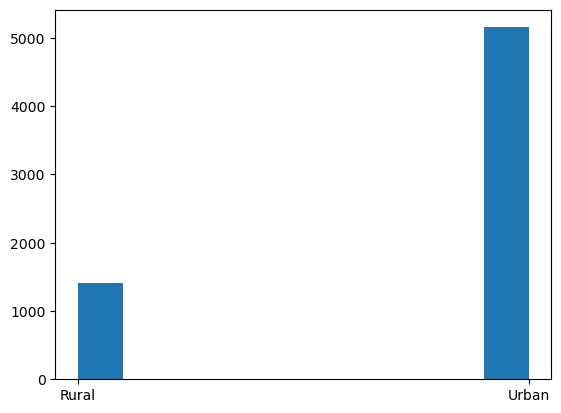

In [54]:
plt.hist(new_df['Area'])
plt.show

In [53]:
new_df.Area.describe()

count      6561
unique        2
top       Urban
freq       5155
Name: Area, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

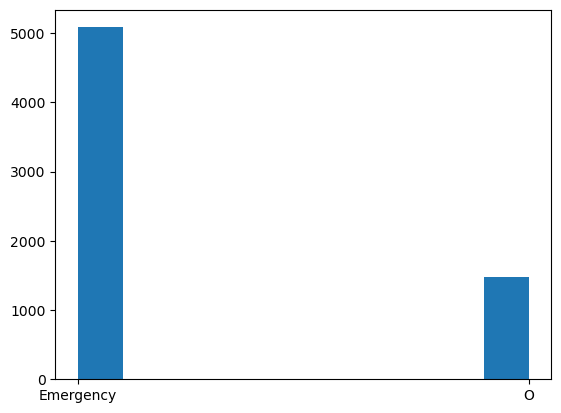

In [46]:
plt.hist(new_df['Initial_admin'])
plt.show

In [47]:
new_df.Initial_admin.describe()

count          6561
unique            2
top       Emergency
freq           5086
Name: Initial_admin, dtype: object

In [49]:
print(new_df.shape)

(6561, 5)


In [50]:
#save to CSV
new_df.to_csv('C:/Users/Kmoik WGU/Desktop/KMoikD210_DMC.csv')